In [1]:
#libraries
import numpy as np

import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
#read in data

df = pd.read_csv('movies.csv')

In [3]:
#preview data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#check for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
#drop null values
df = df.dropna(axis=0)

In [6]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [7]:
#find data types for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
#remove decimal from columns by changing their data type
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [9]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [10]:
df['released'] = pd.to_datetime(df['released'].str.split('(').str[0])

In [14]:
df['correctedyear'] = df['released'].apply(lambda x:x.year)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctedyear
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [15]:
pd.set_option('display.max_rows', None)

In [57]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctedyear
5445,386,5,0,2009,2009-12-18,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019,2019-04-26,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997,1997-12-19,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,2015,2015-12-18,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,2018,2018-04-27,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018


In [17]:
df = df.sort_values(by='gross', inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctedyear
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [ ]:
#budget/gross = high corr
#company/gross = high corr

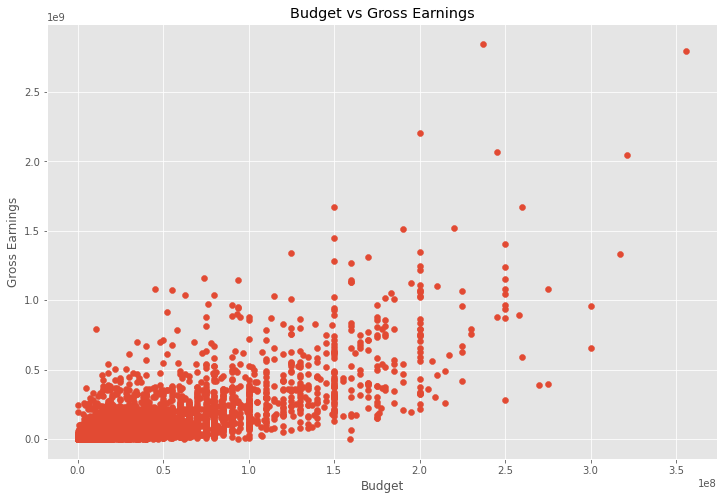

In [23]:
#matplotlib plot

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

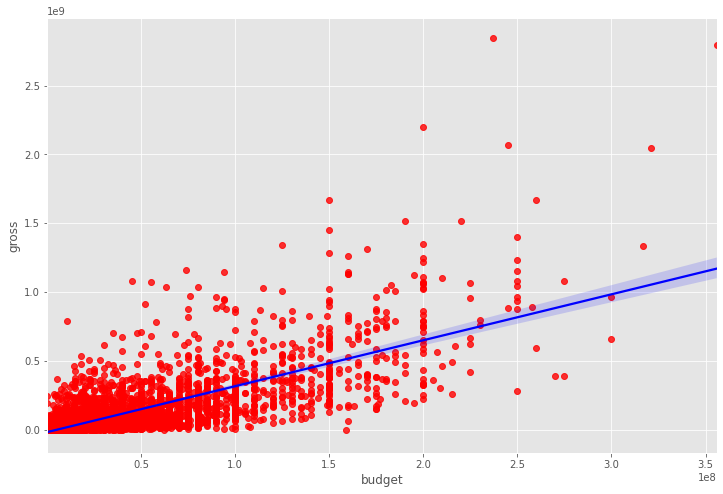

In [30]:
#seaborn plot

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [35]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime,correctedyear
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
correctedyear,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


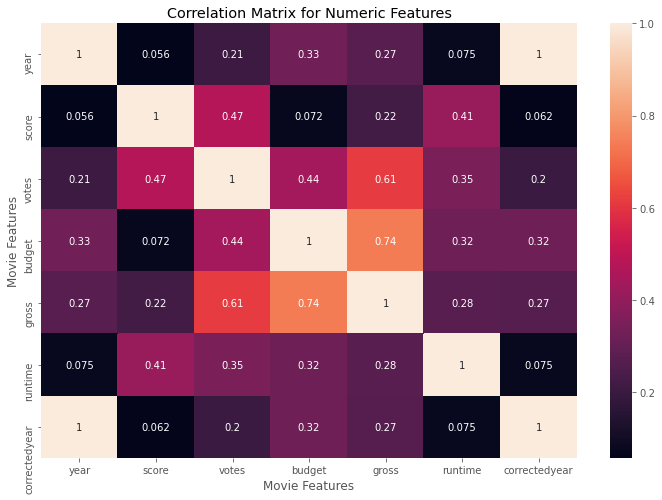

In [43]:
corrmat = df.corr(method='pearson')

sns.heatmap(corrmat, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [58]:
rank = df

for col in rank.columns:
    if (rank[col].dtype=='object'):
        rank[col] = rank[col].astype('category')
        rank[col] = rank[col].cat.codes

rank.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctedyear
5445,386,5,0,2009,2009-12-18,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019,2019-04-26,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997,1997-12-19,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,2015,2015-12-18,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,2018,2018-04-27,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018


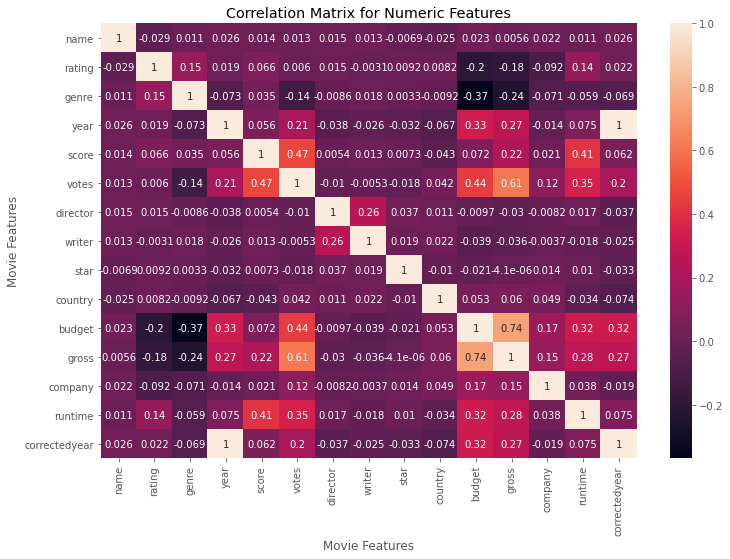

In [45]:
corrmat = rank.corr(method='pearson')

sns.heatmap(corrmat, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [46]:
rank.corr()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,correctedyear
name,1.000000,-0.029234,0.010996,0.025542,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.025542
rating,-0.029234,1.000000,0.147796,0.019499,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.022021
genre,0.010996,0.147796,1.000000,-0.073167,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.069147
year,0.025542,0.019499,-0.073167,1.000000,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.998726
score,0.014450,0.065983,0.035106,0.056386,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061923
votes,0.012615,0.006031,-0.135990,0.206021,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.203098
director,0.015246,0.014656,-0.008553,-0.038354,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.037371
writer,0.012880,-0.003149,0.017578,-0.025908,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.025495
star,-0.006882,0.009196,0.003341,-0.032157,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.032687
country,-0.025490,0.008230,-0.009164,-0.066748,-0.043051,0.041551,0.011133,0.022488,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477,-0.073569


In [59]:
corrmat=rank.corr()
corrpairs = corrmat.unstack()
corrpairs.head()

name  name      1.000000
      rating   -0.029234
      genre     0.010996
      year      0.025542
      score     0.014450
dtype: float64

In [60]:
sortedpairs=corrpairs.sort_values()
sortedpairs.head()

genre   budget   -0.368523
budget  genre    -0.368523
gross   genre    -0.244101
genre   gross    -0.244101
rating  budget   -0.203946
dtype: float64

In [56]:
highcorr=sortedpairs[(sortedpairs)>.5]
highcorr

gross          votes            0.614751
votes          gross            0.614751
gross          budget           0.740247
budget         gross            0.740247
year           correctedyear    0.998726
correctedyear  year             0.998726
name           name             1.000000
writer         writer           1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
correctedyear  correctedyear    1.000000
dtype: float64

In [ ]:
#votes and budget have the highest correlation to gross earnings

#company has low correlation to gross earnings